# Simple Artificial Neural Network

##  Three layers input and output
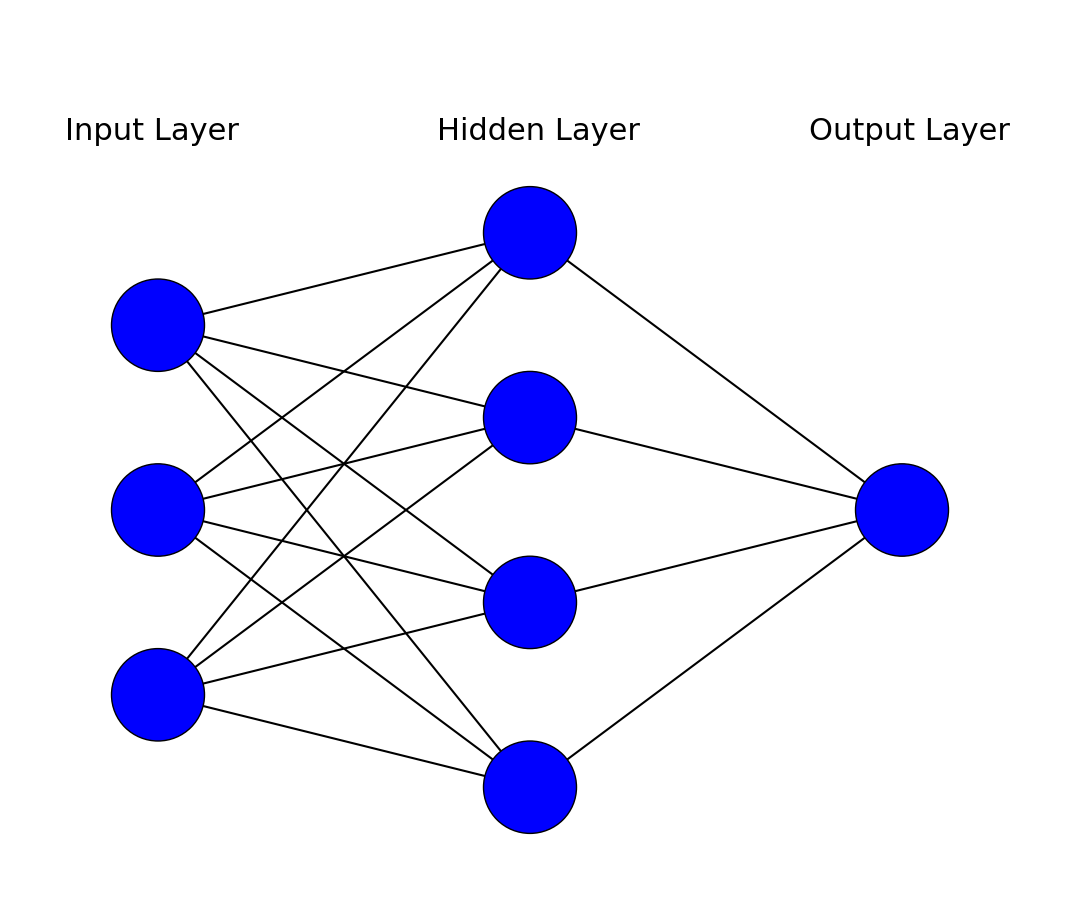

In [24]:
from numpy import exp, array, random, dot, transpose

### Sigmoid function
1. S shaped curve.
2. Pass the weighted sum of the inputs through this function to
3. Normalise them between 0 and 1.
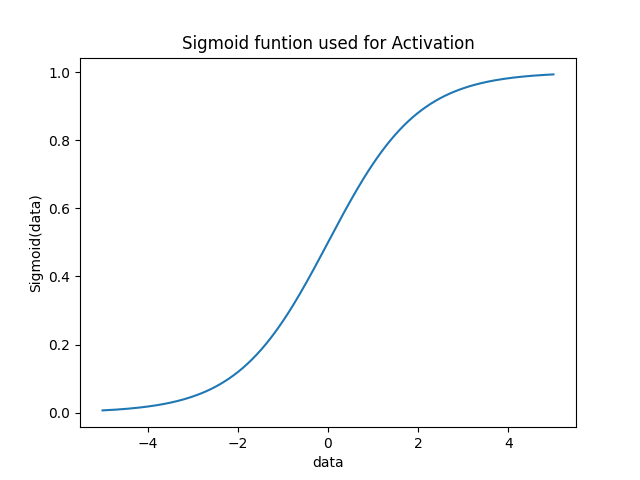

In [25]:
def sig(x):
    return 1/(1 + exp(-x))

### Slope of the Sigmoid function
1. Or the derivative of the Sigmoid function.
2. This is the gradient of the Sigmoid curve.
3. It indicates how confident we are about the existing weight.

In [26]:
def slope(x):
    return x*(1-x)

### Dataset for training input (dti)

In [27]:
dti = array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) 

### Dataset for training output (dto)

In [28]:
dto = array([[0],[1],[1],[0]])

1. Seed the random numbers generator
2. Generates the same numbers every time
3. Initialize a single neuron model, with 3 input layer connections to 4 hidden layer.
4. Also, the 4 hidden layer connections to 1 output layer.
5. Assign random synaptic weights to a 3 x 4 matrix, with values in the range -1 to 1
6. Assign random synaptic weights to a 4 x 1 matrix, with values in the range -1 to 1

In [29]:
random.seed(1)
sw0 = 2*random.random((3,4)) - 1
sw1 = 2*random.random((4,1)) - 1

### Train the neural network through a process of trial and error.
- Forward propagation starts at the begining of the main loop.
- Backpropagation prosess follows in the loop.
- Adjusting the synaptic weights each time at hte end of the loop.
1. Pass the training set through a single neuron neural network with sigmoid activation.
2. Calculate the output layer error.
3. Multiply the output layer error by the gradient of the Sigmoid curve of the output layer.
4. Calculate the hidden layer error that contribute to the output error.
5. Multiply the hidden layer error by the gradient of the Sigmoid curve of the hidden layer.
6. Less confident weights are adjusted more(in steps 3 and 5).
7. Inputs, which are zero, do not cause changes to the weights(in steps 3 and 5).
8. Update weights sw1 and sw0

In [30]:
for i in range(10000):
    # start of the forward propagation
    il = dti
    hl = sig(dot(il,sw0))
    ol = sig(dot(hl,sw1))
    # backpragation follows
    olerr = dto - ol                     # calculate the output layer error
    oldlt = olerr*slope(ol)              # multiply the output error by the derivative of the sigmoid
    hlerr = oldlt.dot(transpose(sw1))    # calculate the hidden layer error that contribute the output layer
    hldlt = hlerr * slope(hl)            # multiply the hidden error by the derivative of the sigmoid
    sw1 += transpose(hl).dot(oldlt)      # adjust the synaptic weghts connecting hidden and output layers
    sw0 += transpose(il).dot(hldlt)      # adjust the synaptic weghts connecting inputo and hidden layers

In [31]:
print('Output')
print(ol)

Output
[[0.00702213]
 [0.99100952]
 [0.99215162]
 [0.01047911]]
